# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

**Вариант:** 14

**Цель работы:** изучить рекурсивные алгоритмы и рекурсивные структуры данных; научиться проводить анализ итеративных и рекурсивных процедур; исследовать эффективность итеративных и рекурсивных процедур при реализации на ПЭВМ.

### Задание 1

Реализуйте рекурсивный алгоритм, распечатывающий все возрастающие последовательности длины N, элементами которых являются натуральные числа 1, 2, ... , K.

In [62]:
K = int(input())
N = int(input())

def findStrictlyIncreasingNum(start, out, n):
    if (n == 0):
        print('(', out, sep='', end = "\b) ")
        return
 
    for i in range(start, K+1):
    
        str1 = out + str(i)
        str1 += ","
 
        findStrictlyIncreasingNum(i + 1, str1, n - 1)
    return 
 

findStrictlyIncreasingNum(1, "", N)

 7
 4


(1,2,3,4) (1,2,3,5) (1,2,3,6) (1,2,3,7) (1,2,4,5) (1,2,4,6) (1,2,4,7) (1,2,5,6) (1,2,5,7) (1,2,6,7) (1,3,4,5) (1,3,4,6) (1,3,4,7) (1,3,5,6) (1,3,5,7) (1,3,6,7) (1,4,5,6) (1,4,5,7) (1,4,6,7) (1,5,6,7) (2,3,4,5) (2,3,4,6) (2,3,4,7) (2,3,5,6) (2,3,5,7) (2,3,6,7) (2,4,5,6) (2,4,5,7) (2,4,6,7) (2,5,6,7) (3,4,5,6) (3,4,5,7) (3,4,6,7) (3,5,6,7) (4,5,6,7) 

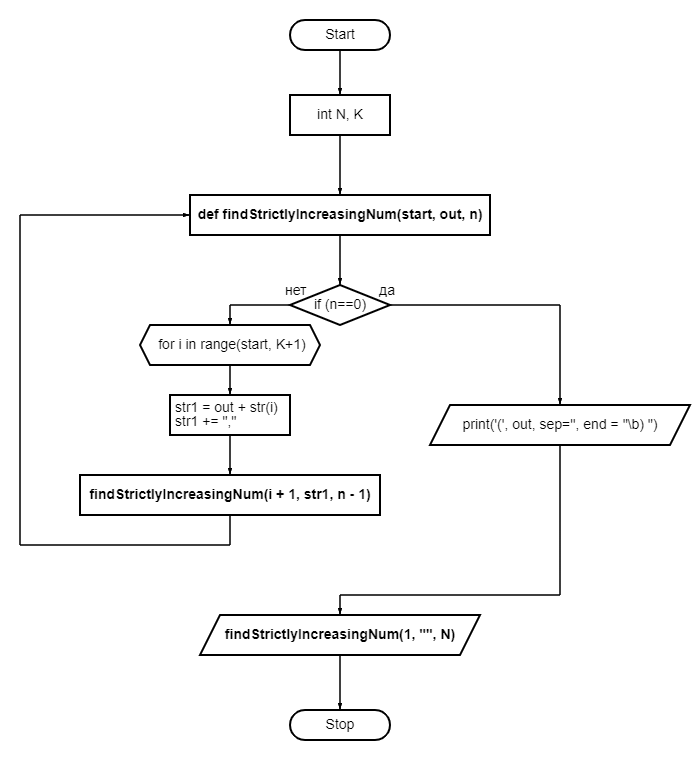

### Задание 2

Реализуйте алгоритм из задания 1 не используя рекурсию.

In [63]:
import itertools

K = int(input())
N = int(input())
val = []
sort_set = []

def up_set(set0):
    for i in range(len(set0) - 1):
        if set0[i] > set0[i + 1]:
            k = False
            break
        else:
            k = True
    return k

def non_rec(k, val, n):
    for i in range(1, k + 1):
        val.append(i)
    perm_set = set(itertools.permutations(val, n))

    for i in perm_set:
        if up_set(i) == True:
            sort_set.append(i)
    return sort_set


print(non_rec(K,val,N))

 7
 4


[(1, 4, 6, 7), (1, 3, 4, 7), (3, 5, 6, 7), (2, 4, 5, 6), (2, 4, 6, 7), (1, 2, 4, 7), (1, 3, 4, 6), (1, 3, 5, 7), (2, 3, 4, 7), (1, 3, 4, 5), (1, 2, 3, 5), (4, 5, 6, 7), (1, 2, 3, 4), (2, 5, 6, 7), (3, 4, 5, 7), (1, 2, 4, 6), (3, 4, 5, 6), (1, 2, 5, 7), (1, 3, 5, 6), (2, 3, 4, 6), (2, 3, 5, 7), (1, 2, 4, 5), (2, 3, 4, 5), (1, 4, 5, 7), (2, 4, 5, 7), (1, 4, 5, 6), (1, 2, 3, 7), (3, 4, 6, 7), (1, 3, 6, 7), (1, 2, 3, 6), (1, 2, 6, 7), (2, 3, 6, 7), (1, 2, 5, 6), (2, 3, 5, 6), (1, 5, 6, 7)]


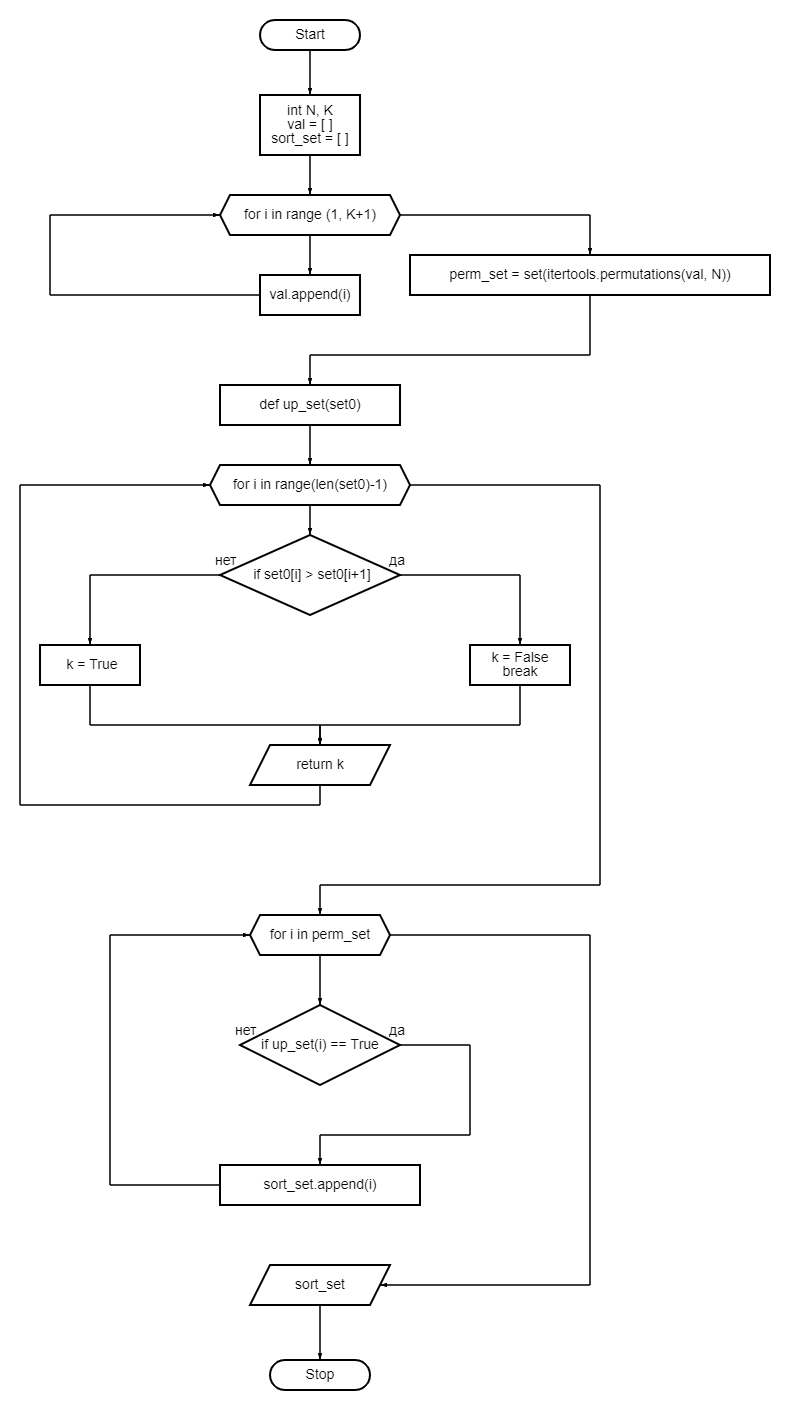

### Задание 3

Для каждого реализованного алгоритма:

- составьте блок-схему **(см. выше)**;

- оцените верхнюю границу размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов;

- модернизируйте рекурсивную реализацию так, чтобы сохранялись промежуточные результаты вызова рекурсии (реализуйте подобный механизм вручную, а также, с помощью декоратора @memoized);

- сравните производительность реализованных алгоритмов (количество итераций (соответственно вызовов рекурсии) подбирайте исходя из условий задачи).

### Оценка верхней границы размерности задачи

Верхняя граница размерности, для которой при рекурсивной реализации не происходит stack overflow:

In [5]:
import sys
print(sys.getrecursionlimit())

3000


### Модернизация

**Ручной механизм мемоизации (сохранение промежуточных значений вызова рекурсии)**

In [55]:
import time

K = int(input())
N = int(input())
cache = {}

start = time.time()

def memoisation(start, out, n):
    if (start, out, n) in cache:
        return cache[(start, out, n)] 
    else:
        if n == 0:
            print('(', out, sep='', end = "\b) ")
            return
        for i in range(start, K+1):
            str1 = out + str(i)
            str1 += ","
            memoisation(i + 1, str1, n - 1)  
        return "<- result"
    

print(memoisation(1, "", N))
end = time.time()
print(end-start)

 7
 4


(1,2,3,4) (1,2,3,5) (1,2,3,6) (1,2,3,7) (1,2,4,5) (1,2,4,6) (1,2,4,7) (1,2,5,6) (1,2,5,7) (1,2,6,7) (1,3,4,5) (1,3,4,6) (1,3,4,7) (1,3,5,6) (1,3,5,7) (1,3,6,7) (1,4,5,6) (1,4,5,7) (1,4,6,7) (1,5,6,7) (2,3,4,5) (2,3,4,6) (2,3,4,7) (2,3,5,6) (2,3,5,7) (2,3,6,7) (2,4,5,6) (2,4,5,7) (2,4,6,7) (2,5,6,7) (3,4,5,6) (3,4,5,7) (3,4,6,7) (3,5,6,7) (4,5,6,7) <- result
0.0009629726409912109


**С помощью декоратора @memoized**

In [59]:
start = time.time()
def memoized(func):
    cache = {}
    def memoizer(start, out, n):
        if (start, out, n) not in cache:
            cache[(start, out, n)] = func(start, out, n)
        return cache[(start, out, n)]
    return memoizer

K = int(input())
N = int(input())

@memoized
def recurs(start, out, n):
    if n == 0:
        print('(', out, sep='', end = "\b) ")
        return 
    for i in range(start, K+1):
    
        str1 = out + str(i)
        str1 += ","
 
        recurs(i + 1, str1, n - 1)
    return "<- result"

print(recurs(1, "", N))

end = time.time()
print(end-start)

 7
 4


(1,2,3,4) (1,2,3,5) (1,2,3,6) (1,2,3,7) (1,2,4,5) (1,2,4,6) (1,2,4,7) (1,2,5,6) (1,2,5,7) (1,2,6,7) (1,3,4,5) (1,3,4,6) (1,3,4,7) (1,3,5,6) (1,3,5,7) (1,3,6,7) (1,4,5,6) (1,4,5,7) (1,4,6,7) (1,5,6,7) (2,3,4,5) (2,3,4,6) (2,3,4,7) (2,3,5,6) (2,3,5,7) (2,3,6,7) (2,4,5,6) (2,4,5,7) (2,4,6,7) (2,5,6,7) (3,4,5,6) (3,4,5,7) (3,4,6,7) (3,5,6,7) (4,5,6,7) <- result
2.747929096221924


### Сравнение


In [26]:
import time

def measure_time(func, *args, **kwargs):
    start = time.time()
    result = func(*args, **kwargs)
    end = time.time()
    return end - start

K = 50
N = 4
val = []

# Рекурсивная реализация
time_rec = measure_time(findStrictlyIncreasingNum, 1, "", N)
print(f"Bремя рекурсивного алгоритма: {time_rec}")

# Реализация без рекурсии
time_non_rec = measure_time(non_rec, K, val, N)
print(f"Реализация без рекурсии: {time_non_rec}")

# Модернизированная реализация
time_mod = measure_time(recurs, 1, "", N)
print(f"Модернизированная реализация время: {time_mod}")

Bремя рекурсивного алгоритма: 0.4073171615600586
Реализация без рекурсии: 15.755016326904297
Модернизированная реализация время: 0.0


In [29]:
import time

def measure_time(func, *args, **kwargs):
    start = time.time()
    result = func(*args, **kwargs)
    end = time.time()
    return end - start

K = 30
N = 7

# Модернизированная реализация
time_mod = measure_time(recurs, 1, "", N)
print(f"Модернизированная реализация время: {time_mod}")

Модернизированная реализация время: 83.57664251327515
